We move on the the DIAGNOSES_ICD table. <br>
Let's import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
diagnosesICD_df = pd.read_csv('..\Extracted CSVs\DIAGNOSES_ICD.csv')

In [4]:
diagnosesICD_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [5]:
diagnosesICD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [6]:
diagnoses_dict = pd.read_csv('..\Extracted CSVs\D_ICD_DIAGNOSES.csv')

We merge the diagnoses_dict and diagnosesICD_df to obtain more information.

In [7]:
merged_diagnoses = pd.merge(diagnoses_dict,diagnosesICD_df,on='ICD9_CODE')

The SEQ_NUM column tells us the priority of the code. 

In [8]:
merged_diagnoses['LONG_TITLE'].value_counts()

Unspecified essential hypertension                              20703
Congestive heart failure, unspecified                           13111
Atrial fibrillation                                             12891
Coronary atherosclerosis of native coronary artery              12429
Acute kidney failure, unspecified                                9119
                                                                ...  
Simple type schizophrenia, chronic                                  1
Other congenital anomalies of posterior segment                     1
Other abnormal Papanicolaou smear of cervix and cervical HPV        1
Syphilitic iridocyclitis (secondary)                                1
Foreign body granuloma of muscle                                    1
Name: LONG_TITLE, Length: 6839, dtype: int64

In [9]:
merged_diagnoses['LONG_TITLE'].value_counts().head()

Unspecified essential hypertension                    20703
Congestive heart failure, unspecified                 13111
Atrial fibrillation                                   12891
Coronary atherosclerosis of native coronary artery    12429
Acute kidney failure, unspecified                      9119
Name: LONG_TITLE, dtype: int64

These are the most common diagnoses.

In [10]:
merged_diagnoses['SHORT_TITLE'].value_counts().head()

Hypertension NOS            20703
CHF NOS                     13111
Atrial fibrillation         12891
Crnry athrscl natve vssl    12429
Acute kidney failure NOS     9119
Name: SHORT_TITLE, dtype: int64

Let's look at the DRGCODES table.

In [12]:
drgcodes_df = pd.read_csv('../Extracted CSVs/DRGCODES.csv')

In [13]:
drgcodes_df.head()


,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN


In [14]:
drgcodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125557 entries, 0 to 125556
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ROW_ID         125557 non-null  int64  
 1   SUBJECT_ID     125557 non-null  int64  
 2   HADM_ID        125557 non-null  int64  
 3   DRG_TYPE       125557 non-null  object 
 4   DRG_CODE       125557 non-null  int64  
 5   DESCRIPTION    125494 non-null  object 
 6   DRG_SEVERITY   66634 non-null   float64
 7   DRG_MORTALITY  66634 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.7+ MB


The last two columns, DRG_SEVERITY and DRG_MORTALITY are available for APR Diagnosis-Related Group Only.

In [15]:
drgcodes_df['DRG_TYPE'].value_counts()

APR     66634
HCFA    31644
MS      27279
Name: DRG_TYPE, dtype: int64

([<matplotlib.patches.Wedge at 0x1ab8e2dd640>,
 [Text(-0.10595188169244121, 1.0948854728992576, 'APR'),
  Text(-0.6084140484338874, -0.916423671490587, 'HCPA'),
  Text(0.8535603846509904, -0.6938549342293773, 'MS')])

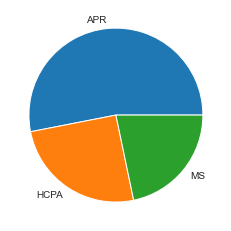

In [16]:
plt.pie(drgcodes_df['DRG_TYPE'].value_counts(), labels = ['APR', 'HCPA', 'MS'])

These are the three different types of drugs administered.

The three types of DRG codes in the MIMIC-III database are ‘HCFA’ (Health Care Financing Administration), ‘MS’ (Medicare), and ‘APR’ (All Payers Registry).

In [17]:
drgcodes_df[drgcodes_df['DRG_SEVERITY'].notnull()]

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
10546,13782,21729,192719,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,3.0
10548,13784,9270,171336,APR,44,Tracheostomy W Long Term Mechanical Ventilatio...,4.0,3.0
10560,13796,11318,151558,APR,7204,Septicemia & Disseminated Infections,4.0,4.0
10713,15353,252,190159,APR,2804,Alcoholic Liver Disease,4.0,4.0
10714,15354,25188,160667,APR,1694,Major Thoracic & Abdominal Vascular Procedures,4.0,3.0
...,...,...,...,...,...,...,...,...
125550,123450,71582,101422,APR,1632,Cardiac Valve Procedures w/o Cardiac Catheteri...,2.0,1.0
125551,123451,71582,101422,APR,1632,Cardiac Valve Procedures w/o Cardiac Catheteri...,2.0,1.0
125553,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0
125554,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0


In [18]:
drgcodes_df[drgcodes_df['DRG_SEVERITY'].notnull()]['DRG_SEVERITY'].value_counts()

3.0    24297
4.0    22978
2.0    14282
1.0     5076
0.0        1
Name: DRG_SEVERITY, dtype: int64

0 is the least severe and 4.0 is the most severe.

([<matplotlib.patches.Wedge at 0x1ab8f0b5a00>,
 [Text(0.45381925184728966, 1.002021999086231, '3.0'),
  Text(-1.0703236412454753, -0.2537859393091493, '4.0'),
  Text(0.4472429920238888, -1.0049744803155551, '2.0'),
  Text(1.0686252488713253, -0.2608449299386483, '1.0'),
  Text(1.0999999987829023, -5.174567768221638e-05, '0.0')])

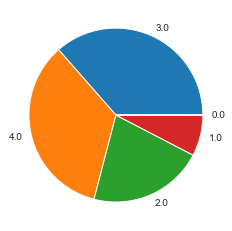

In [19]:
plt.pie(drgcodes_df[drgcodes_df['DRG_SEVERITY'].notnull()]['DRG_SEVERITY'].value_counts(), labels = '3.0 4.0 2.0 1.0 0.0'.split())

In [20]:
drgcodes_df[drgcodes_df['DRG_SEVERITY'].notnull()]['DRG_MORTALITY'].value_counts()

4.0    19684
3.0    18726
2.0    14752
1.0    13471
0.0        1
Name: DRG_MORTALITY, dtype: int64

0 is the least risky and 4.0 is the most risky.

([<matplotlib.patches.Wedge at 0x1ab8f657940>,
 [Text(0.6593431495471344, 0.8804922550171952, '4.0'),
  Text(-1.0120347529390163, 0.4310286055978937, '3.0'),
  Text(-0.42333426146144787, -1.015277352782426, '2.0'),
  Text(0.885440916177257, -0.6526824526208591, '1.0'),
  Text(1.0999999987780527, -5.1848667114817566e-05, '0.0')])

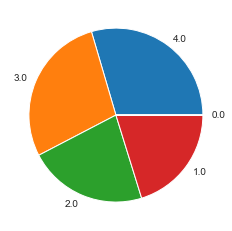

In [21]:
plt.pie(drgcodes_df[drgcodes_df['DRG_SEVERITY'].notnull()]['DRG_MORTALITY'].value_counts(), labels = '4.0 3.0 2.0 1.0 0.0'.split())